In [30]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)


"""Our system of differential equations belongs to the complex space, that is why we implemented the code suggested in"""
"""https://stackoverflow.com/questions/19910189/scipy-odeint-with-complex-initial-values."""

import time
import numpy as np
from scipy.integrate import odeint
from scipy.special import zeta
from random import choices

def odeintz(func, z0, t, **kwargs):
   
    
    """An odeint-like function for complex valued differential equations.

    Inputs:
    ----------
      -func: function associated to dr/dt=f(x;t), where x is the set of parameters and variables to be determined
      -z0: 1d array with length N*(5N-1)/2
      -t: 1d array from t=0 to t=tf (parameter set by the user)
      - **kwargs: keyword arguments related with external functions to be used in odeint
    
    Return:
      -z: multivariable array with the solution of the differential equation associated with each variable"""

    # Disallow Jacobian-related arguments.
    _unsupported_odeint_args = ['Dfun', 'col_deriv', 'ml', 'mu']
    bad_args = [arg for arg in kwargs if arg in _unsupported_odeint_args]
    if len(bad_args) > 0:
        raise ValueError("The odeint argument %r is not supported by "
                         "odeintz." % (bad_args[0],))

    # Make sure z0 is a numpy array of type np.complex128.
    z0 = np.array(z0, dtype=np.complex128, ndmin=1)

    def realfunc(x, t, *args):
        z = x.view(np.complex128)
        dzdt = func(z, t, *args)
        # func might return a python list, so convert its return
        # value to an array with type np.complex128, and then return
        # a np.float64 view of that array.
        return np.asarray(dzdt, dtype=np.complex128).view(np.float64)

    result = odeint(realfunc, z0.view(np.float64), t, **kwargs)

    if kwargs.get('full_output', False):
        z = result[0].view(np.complex128)
        infodict = result[1]
        return z, infodict
    else:
        z = result.view(np.complex128)
        return z

In [31]:
def Jij(J,j,w,epsilon,N,Vect):
    
    norm=np.linalg.norm(np.array(Vect[j])-np.array(Vect[w]))
    
    return (J/N)*(1/norm**epsilon)*(1/dist_ar**epsilon)
    
    

In [33]:
#DTWA


#length_side=2
#N=length_side**3

N=4
J=4
epsilon=0

refgamma=0.2  #Fixed
refomega=0
refdecay=0

Gamma_du=0
Gamma_phi=refgamma*J

Gamma_decay=refdecay*J

Omega=refomega*J
dist_ar=1


#for -z

def init_vect(N=N):
    rx=[]
    ry=[]
    rz=[]
    for j in range(N):
        
        a=(choices([-1,1]))[0]
        b=(choices([-1,1]))[0]
        
        rx.append(1)
        ry.append(a)
        rz.append(b)


    return rx+ry+rz



def Vectors(length_side):
    vect=[]
    for j in range(length_side**3):
        b=j//length_side**2
        c=(j-b*length_side**2)//length_side
        d=j-b*length_side**2-c*length_side
        vect.append([b,c,d])
    return vect


#Vect=Vectors(length_side)


def Jij(J,j,w,epsilon,N,Vect):
    
    norm=np.linalg.norm(np.array(Vect[j])-np.array(Vect[w]))
    
    return (J/N)*(1/norm**epsilon)*(1/dist_ar**epsilon)

Vect=[]

def vectorsR(r, t,N=N,J=J,epsilon=epsilon,Gamma_phi=Gamma_phi,Omega=Omega,Vect=Vect):   
    
    #matrix_zero=np.zeros((int(3*N),int(3*N)),dtype = 'complex_')
    matrix_zero=np.zeros((int(3*N),int(3*N)))
    
    
    drdt =  np.matmul(matrix_zero, r)  #matrix_zero @ r   #sum of the linear and the constant part
    #drdt = matrix_zero @ r
    
    
    ###Define Vect which is an array of coordinates of size N
    
    
    for j in range(N):
        
        
        drdt[j]=drdt[j]-Gamma_phi*r[j]-(Gamma_decay/2)*r[j]   #s_i^x
        drdt[j+N]=drdt[j+N]-Omega*r[j+2*N]-Gamma_phi*r[j+N]-(Gamma_decay/2)*r[j+N]    #s_i^y
        drdt[j+2*N]=drdt[j+2*N]+Omega*r[j+N]-(Gamma_decay)*(r[j+2*N]+1)    #s_i^z
    
    
       
        for w in range(N):
            
            if w!=j:
                #norm=np.linalg.norm(np.array(Vect[j])-np.array(Vect[w]))
                
                
                #drdt[j]=drdt[j]-2* r[j+N]*r[w+2*N]*(J/N)*(1/norm**epsilon)*(1/dist_ar**epsilon)  #s_i^x
                #drdt[j+N]=drdt[j+N]+2* r[j]*r[w+2*N]*(J/N)*(1/norm**epsilon)*(1/dist_ar**epsilon)  #s_i^y  
                
                drdt[j]=drdt[j]-2* r[j+N]*r[w+2*N]*(J/N)  #s_i^x  all to all
                drdt[j+N]=drdt[j+N]+2* r[j]*r[w+2*N]*(J/N)  #s_i^y             
        
               
    return drdt





In [34]:
def S_array(z):
    Sx=z[:,0]
    Sy=z[:,N]
    Sz=z[:,2*N]
    
    FullSx=[Sx/2]
    FullSy=[Sy/2]
    FullSz=[Sz/2]
    
    
    
    for j in range(1,N):
        Sx=np.add(Sx,z[:,j])
        Sy=np.add(Sy,z[:,N+j])
        Sz=np.add(Sz,z[:,2*N+j])
        
        FullSx.append(z[:,j]/2)
        FullSy.append(z[:,N+j]/2)
        FullSz.append(z[:,2*N+j]/2)
        
        
        
    
    Sx=Sx/2
    Sy=Sy/2
    Sz=Sz/2
    
    
    return Sx, Sy, Sz, FullSx, FullSy, FullSz


def history(n):
    
    count=1

    z0=init_vect(N)
    z = odeint(vectorsR, z0, t)
    
    Sx=S_array(z)[0]
    Sy=S_array(z)[1]
    Sz=S_array(z)[2]
    
    FullSx=[list(Sx)]
    FullSy=[list(Sy)]
    FullSz=[list(Sz)]
    
    
    
    Sxx= (Sx)**2
    Syy=(Sy)**2
    Szz=(Sz)**2
    

    for j in range(2,n+1):
        
        count=count+1
        
        z0=init_vect(N)
        z = odeint(vectorsR, z0, t)
        
        Sx = Sx+S_array(z)[0]
        Sy = Sy+S_array(z)[1]
        Sz = Sz+S_array(z)[2]
        
        FullSx.append(list(S_array(z)[0]))
        FullSy.append(list(S_array(z)[1]))
        FullSz.append(list(S_array(z)[2]))
        
        
        Sxx = Sxx+(S_array(z)[0])**2
        Syy = Syy+(S_array(z)[1])**2
        Szz = Szz+(S_array(z)[2])**2
        
        
    return Sx/(count),Sy/(count),Sz/(count),Sxx/(count),Syy/(count),Szz/(count),FullSx,FullSy,FullSz

In [35]:
t=np.linspace(0,15,100)

t0=time.time()
a=history(1000)
t1=time.time()

print(t1-t0)



83.88431882858276


In [36]:
smz = np.matrix(a[-1])
smy=np.matrix(a[-2])
smx=np.matrix(a[-3])

In [37]:
import pandas as pd

Resultsz=pd.DataFrame(smz)
Resultsy=pd.DataFrame(smy)
Resultsx=pd.DataFrame(smx)

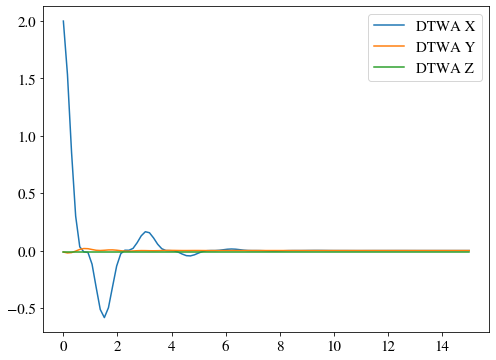

In [38]:
plt.plot(t,Resultsx.mean(),label="DTWA X")
plt.plot(t,Resultsy.mean(),label="DTWA Y")
plt.plot(t,Resultsz.mean(),label="DTWA Z")

plt.legend()

I have to include further terms in cumulant

In [39]:
gammaplus=Gamma_du/2
gammaminus=Gamma_decay/2
gammaz=Gamma_phi/4


Gamma=np.array([gammaplus,gammaminus,gammaz])  #[gamma+,gamma-,gammaz]


### Initial State

"""We consider by defect that the system starts in |0> for all the spins. The user can set the initial state as well."""
"""Recall that |0><0|=[[1,0],[0,0]]  """

"""The benchmark suggests that our initial state should be |psi(0)>=|+>"""


#t0=time.time()



def trace(A):
    return np.trace(A)

def matmu(A,B):
    return np.matmul(A,B)


rho_init0=np.array([[1/2,1/2],[1/2,1/2]])    #density matrix |+><+|
rho_init1=np.array([[1/2,1/2],[1/2,1/2]])    #density matrix |+><+|



#rho_init1=np.array([[1,0],[0,0]])    #By default
#rho_init2=np.array([[1,0],[0,0]])    #By default


sigma_p= np.array([[0,1],[0,0]])
sigma_m= np.array([[0,0],[1,0]])
sigma_z= np.array([[1,0],[0,-1]])


##Initial values one operator

sp_init0=trace(matmu(rho_init0,sigma_p))
sz_init0=trace(matmu(rho_init0,sigma_z))
sp_init1=trace(matmu(rho_init1,sigma_p))
sz_init1=trace(matmu(rho_init1,sigma_z))
sm_init1=trace(matmu(rho_init1,sigma_m))


##Initial values two-operators
## We assume initial separability of the state
#p0, z0, p1, z1 , p0p1, p0m1, z0p1, p0z1, z0z1 = z


sp_initp0p1=sp_init0*sp_init1
sz_initp0m1=sp_init0*sm_init1
sp_initz0p1=sz_init0*sp_init1
sz_initp0z1=sp_init0*sz_init1
sz_initz0z1=sz_init0*sz_init1




z0=np.array([sp_init0,sz_init0,sp_initp0p1,sz_initp0m1,sp_initz0p1,sz_initz0z1])



#t1=time.time()

#print(t1-t0)

#t0=time.time()

def cj(z): 
    return z.conjugate()

def real(z): 
    return z.real

def imag(z): 
    return z.imag


def dot_p(v1,v2):
    return np.dot(v1,v2)



    # Define the right-hand-side of the differential equation.
def zfunc(z, t):
    p0, z0, p0p1, p0m1,   z0p1, z0z1 = z        
     
    
        
    dp0dt=2*1j*(J/N)*(N-1)*z0p1    -(Gamma[0]+Gamma[1]+4*Gamma[2])*p0
        
    dz0dt= 2*(Gamma[0]-Gamma[1])-2*(Gamma[0]+Gamma[1])*z0  
        
    dp0p1dt=4*1j*(J/N)*(N-2)*(p0p1*z0+2*(z0p1-p0*z0)*p0)    -2*(Gamma[0]+Gamma[1]+4*Gamma[2])*p0p1

    dp0m1dt=-2*(Gamma[0]+Gamma[1]+4*Gamma[2])*p0m1

    dz0p1dt=2*1j*(J/N)*( p0 + (N-2)*(z0z1*p0+2*(z0p1-z0*p0)*z0) )+2*(Gamma[0]-Gamma[1])*p0   
    dz0p1dt=dz0p1dt -(3*(Gamma[0]+Gamma[1])+4*Gamma[2])*z0p1
            
    dz0z1dt=      - 4*(Gamma[1]-Gamma[0])*z0-4*(Gamma[0]+Gamma[1])*z0z1
        
        
        
        
    return [dp0dt, dz0dt, dp0p1dt, dp0m1dt, dz0p1dt, dz0z1dt] 

    # Set up the inputs and call odeintz to solve the system.

z, infodict = odeintz(zfunc, z0, t, full_output=1)
    
#t1=time.time()
#print(t1-t0)

C:\Users\camil\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


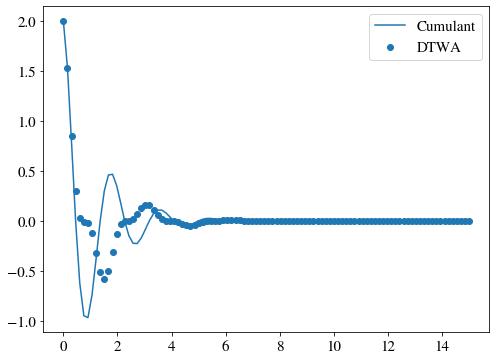

In [40]:
plt.scatter(t,Resultsx.mean(),label="DTWA")

plt.plot(t,(N/2)*(z[:,0]+np.conjugate(z[:,0])),label="Cumulant")

#plt.plot(t, (N/2)*np.exp(-Gamma_phi*t)*(np.cos(2*J*t/N))**(N-1),label="Analytic")

plt.legend()

In [41]:
Gamma_ud=2*gammaplus
Gamma_du=2*gammaminus
Gamma_el=8*gammaz

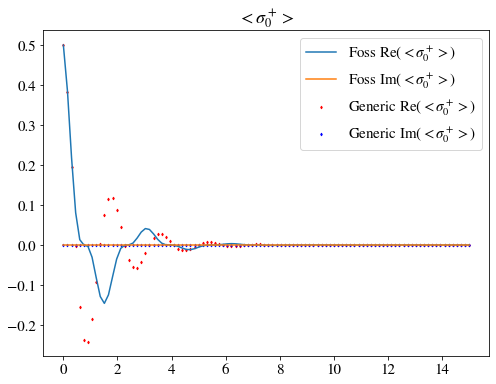

In [42]:
Gamma_r=Gamma_ud+Gamma_du


gamma=(Gamma_ud-Gamma_du)/4

Tot=Gamma_r+Gamma_el

lamda=Gamma_r/2

J01=J


s=2*1j*gamma+2*J01/N
r=Gamma_ud*Gamma_du

def p0_gen(t):
    return  0.5*np.exp(-Tot*t/2)*( np.exp(-lamda*t)*( np.cos(t*(s**2-r)**0.5) +  lamda*np.sin(t*(s**2-r)**0.5)/((s**2-r)**0.5)) )**(N-1)

import matplotlib.pyplot as plt

plt.title('$<\sigma_0^+>$')
plt.plot(t,np.real(p0_gen(t)),label="Foss Re($<\sigma_0^+>$)")
plt.scatter(t,np.real(z[:,0]),label="Generic Re($<\sigma_0^+>$)",color='r',marker='d',s=3)
plt.plot(t,np.imag(p0_gen(t)),label="Foss Im($<\sigma_0^+>$)")
plt.scatter(t,np.imag(z[:,0]),label="Generic Im($<\sigma_0^+>$)",color='b',marker='d',s=3)
plt.legend()
plt.show()

C:\Users\camil\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\camil\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


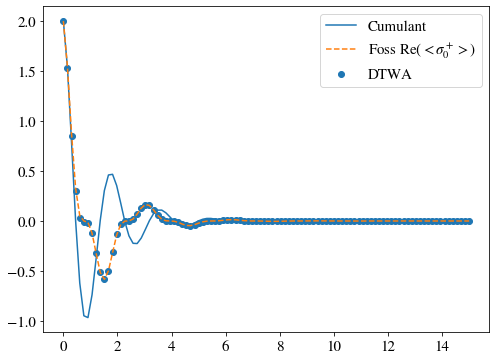

In [44]:
plt.scatter(t,Resultsx.mean(),label="DTWA")

plt.plot(t,(N/2)*(z[:,0]+np.conjugate(z[:,0])),label="Cumulant")

plt.plot(t,(N/2)*(p0_gen(t)+np.conjugate(p0_gen(t))),"--",label="Foss Re($<\sigma_0^+>$)")

plt.legend()